In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
dataset=pd.read_csv("Dataset_for_Internship.csv",encoding='unicode_escape')
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,17284302,El Vaquero Mexican Restaurant,216,Albany,-84.2194,31.6158,Mexican,0,Dollar($),No,No,No,1,3.4,Orange,Average,45
1,17330155,Deorio's,216,Columbus,-84.9427,32.4810,"Italian, Pizza",0,Dollar($),No,No,No,1,4.0,Green,Very Good,170
2,17334679,Azteca,216,Davenport,-90.5683,41.5699,Mexican,0,Dollar($),No,No,No,1,4.3,Green,Very Good,167
3,17342548,Happy Joe's Pizza & Ice Cream,216,Dubuque,-90.7264,42.4955,"Desserts, Pizza, Ice Cream",0,Dollar($),No,No,No,1,3.5,Yellow,Good,74
4,17582499,Royal Hotel,216,Pocatello,-112.0127,42.6192,"Pizza, Bar Food",0,Dollar($),No,No,No,1,3.6,Yellow,Good,59


# Task 4: Restaurant Chains

### 1. Identify if there are any restaurant chains present in the dataset.

In [3]:
restaurant_counts = dataset['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1]
restaurant_chains.head(10)

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

In [4]:
restaurant_chains_df = restaurant_chains.reset_index()
restaurant_chains_df.columns = ['Restaurant Name', 'Count']
top_n = restaurant_chains_df.head(10)
top_n

,Restaurant Name,Count
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48
5,Keventers,34
6,Pizza Hut,30
7,Giani,29
8,Baskin Robbins,28
9,Barbeque Nation,26


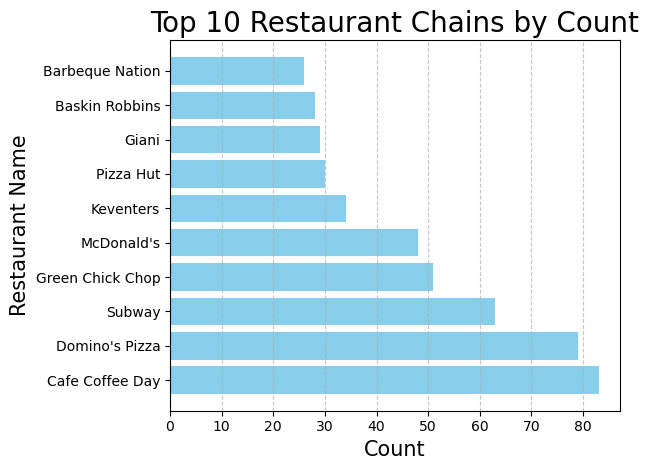

In [5]:
# Plot horizontal bar chart
plt.barh(top_n['Restaurant Name'], top_n['Count'], color='skyblue')
plt.xlabel('Count', fontsize=15)
plt.ylabel('Restaurant Name', fontsize=15)
plt.title('Top 10 Restaurant Chains by Count', fontsize=20)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cafe Coffee Day and Domino's Pizza lead with the most outlets, reflecting strong market presence. Fast food chains like Subway and McDonald's are popular, while Giani and Baskin Robbins show high competition in the dessert market.

### 2.Analyze the ratings and popularity of different restaurant chains.

In [6]:
average_ratings = dataset.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index()
average_ratings.columns = ['Restaurant Name', 'Average Rating']
average_ratings.columns

Index(['Restaurant Name', 'Average Rating'], dtype='object')

In [7]:
restaurant_analysis = pd.merge(restaurant_chains_df, average_ratings, on='Restaurant Name')

In [8]:
restaurant_analysis_sorted = restaurant_analysis.sort_values(by='Count', ascending=False).head(10)
restaurant_analysis_sorted

,Restaurant Name,Count,Average Rating
0,Cafe Coffee Day,83,2.419277
1,Domino's Pizza,79,2.740506
2,Subway,63,2.907937
3,Green Chick Chop,51,2.672549
4,McDonald's,48,3.339583
5,Keventers,34,2.870588
6,Pizza Hut,30,3.320000
7,Giani,29,2.689655
8,Baskin Robbins,28,1.860714
9,Barbeque Nation,26,4.353846


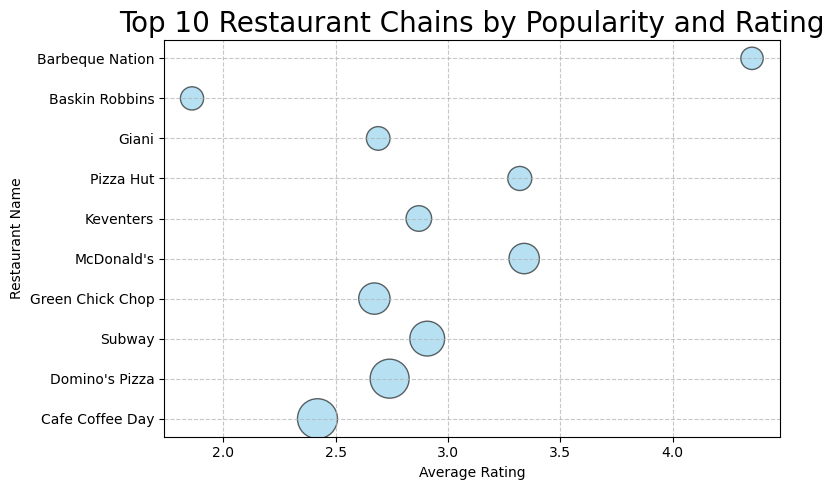

In [10]:
import matplotlib.pyplot as plt

#Plotting the data with a scatter plot (bubble chart)
plt.figure(figsize=(8,5))
plt.scatter(restaurant_analysis_sorted['Average Rating'], restaurant_analysis_sorted['Restaurant Name'], 
            s=restaurant_analysis_sorted['Count']*10,  # Bubble size, scaled for better visualization
            alpha=0.6, 
            color='skyblue', 
            edgecolor='black')
plt.xlabel('Average Rating', fontsize=10)
plt.ylabel('Restaurant Name', fontsize=10)
plt.title('Top 10 Restaurant Chains by Popularity and Rating', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
